# Adaline

### Imports

In [13]:
import numpy as np
from matplotlib.pyplot import *
from sklearn import *
from sklearn.datasets.samples_generator import make_blobs


### Ensemble de données 2D  composé de deux classes LS  -Question1

In [6]:
M, C = make_blobs(n_samples=100, n_features=2, centers=[(5,5),(10,10)]) 
C = 2*C - 1

M = np.hstack((np.ones((100, 1)), M))

feature_names = np.array(["area", "perimeter"])

### Plot avec 'Scatterd' des données (area,perimeter)-Question 2  

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 5: ordinal not in range(128)

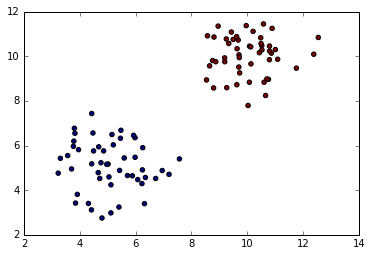

In [11]:
%matplotlib inline 
figure(1)
scatter(M[:,1],M[:,2], c=C )
title("2 : Vérifier les données générées")
xlabel(feature_names[0])
ylabel(feature_names[1])
show()

### Calculer l'ecart entre la sortie désirée et la sortie calculée-Question 3

In [27]:

# X : Entrée
# W : Poids
# d : Sortie désirée

def err_adal (X, W, d):
    y = W.dot(X)
    ecart = d - y
    return ecart[0]


### Calcule du gradient-Question 4

In [28]:

# X : Entrée
# e : Valeur de l'écart
 
def grad_adal (X, e):
    grad = np.zeros(X.size) 
    grad = -2*e*X
    return grad

### MAJ les poids des connexions dans l'Adaline en fonction du gradient-Question 5

In [29]:
 
# W : Poids
# p : pas du gradient
# R : Approximation du gradient
 
def adapt_adal (W, p, R):
    majW = np.zeros(W.size)
    majW = W - p*R
    return majW


### Apprentissage de l'Adaline avec un pas du gradient p=0,1 -Question 6

In [18]:
def initW () :
    W = np.zeros((1,3))
    W[0,0] = 0.3
    W[0,1] = 0.8
    W[0,2] = 0.4
    return W
    

# iters : Nombre d'itérations
# p : pas du gradient

def adaline (X, d, p, iters):
    W = initW().reshape(1,3)
   # X = np.hstack((np.ones((100, 1)), X))
    TX = np.transpose(X)

    for i in range(0, iters) :
        err = err_adal (TX[:,i%d.size], W[0,:], d)
        grad = grad_adal (X[i%d.size,:], err)    
        adapt = adapt_adal(W, p, grad)
    return adapt[0]

ada = adaline (M, C, 0.1, 1000)
print ada


[ -1.76023016 -17.48250158 -19.69725329]


### Representation graphique -Question 7

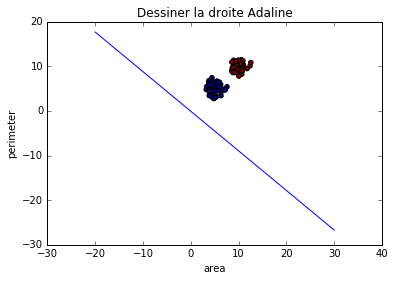

In [19]:

x = np.array([-20,20,30])

figure(2)
plot(x,-(ada[1]*x/ada[2]) - (ada[0]/ada[2]));
#plot(x, ada[1]*x + ada[2]*x + ada[0]);
scatter(M[:,1],M[:,2], c=C )
title("Dessiner la droite Adaline")
xlabel(feature_names[0])
ylabel(feature_names[1])
show()


# Perceptron 

### Sortie calculée par le perceptron -Question 8

In [30]:
# f : fonction 
# X : Entrée
# W : Poids
# d : Sortie désirée

def out_percep (X, W):
    y = W.dot(X)
    if y > 0 :
        return 1
    if y > 0 :
        return -1

### Calculer une approximation du gradient -Question 9

In [21]:
# X : Entrée
# d : Sortie désirée
# Et on considère la fonction de transition phi(X, k)=X[k]
 
def grad_percep (X, d):
    grad = np.zeros(X.size) 
    grad = X*d
    return grad


N = np.hstack((np.ones((100, 1)), M))
grad_percep(N[1%C.size,:], C[1])

array([ 1.        ,  1.        ,  8.54295594,  8.93772167])

### MAJ les poids des connexions-Question 10

In [22]:
 # W : Poids
# s : Sortie perceptron
# p : pas du gradient
# R : Approximation du gradient
# d : Sortie désirée

def adapt_percep (W, s, p, R, d):
    majW = np.zeros(W.size)
    if s == d :
        majW = W
    if s != d :
        majW = W + p*R
    return majW

### Apprentisage du modèle Perceptron -Question 11

In [31]:
# p : pas du gradient
# R : Approximation du gradient
# iters : Nombre d'itérations
# p : pas du gradient

def perceptron (X, d, p, iters):
    W = initW().reshape(1,3)
    TX = np.transpose(X)

    for i in range(0, iters) :
        out = out_percep (TX[:,i%d.size], W[0,:])
        grad = grad_percep (X[i%d.size,:], d[i%d.size])    
        adapt = adapt_percep(W, out, p, grad, d[i%d.size])
    return adapt[0]
    
    
perc = perceptron (M, C, 0.1, 1000)
print perc

[ 0.3  0.8  0.4]


### Représentation graphique de l'ensemble des echantillons et de l'hyperplan séparant les deux classes-Question 12

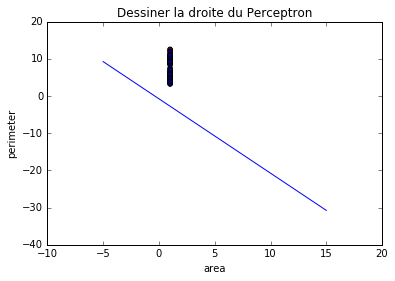

In [32]:
x = np.array([-5,15])
figure(3)
plot(x,-(perc[1]*x/perc[2]) - (perc[0]/perc[2]));
scatter(M[:,0],M[:,1], c=C )
title("Dessiner la droite du Perceptron")
xlabel(feature_names[0])
ylabel(feature_names[1])
show()

### L'ajout de 10 points de telle facon que le problème reste LS-Question 13

In [25]:
#################
#### Question 13 : 
 
M1, C1 = make_blobs(n_samples=10, n_features=1, centers=[(10,0)]) 
C1 = C1*0 - 1
M1 = np.hstack((np.ones((10, 1)), M1))

M = np.vstack((M, M1))
C = np.hstack((C, C1))    

M.shape
C.shape

(110,)

## Perceptron & Adaline 

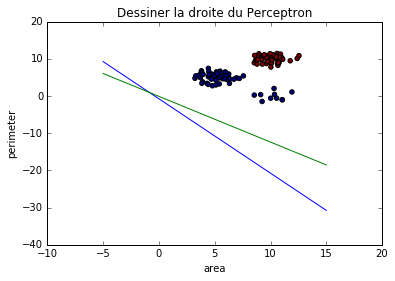

In [26]:
x = np.array([-5,15])
ada14 = adaline (M, C, 0.1, 1000)
perc14 = perceptron (M, C, 0.1, 1000)
figure(4)
plot(x,-(perc14[1]*x/perc14[2]) - (perc14[0]/perc14[2]));
plot(x,-(ada14[1]*x/ada14[2]) - (ada14[0]/ada14[2]));
scatter(M[:,1],M[:,2], c=C )
title("Dessiner la droite du Perceptron")
xlabel(feature_names[0])
ylabel(feature_names[1])
show()
